<a href="https://colab.research.google.com/github/hamzaharmanhusni/Project-Dicoding/blob/main/ProjeckTimeSeriesDicoding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preprocessing

In [ ]:
#Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from sklearn.model_selection import train_test_split


In [ ]:
df = pd.read_csv("openweatherdata-denpasar-1990-2020.csv")
df.shape

(264924, 32)

In [ ]:
df.isnull().sum()

dt                          0
dt_iso                      0
timezone                    0
city_name                   0
lat                         0
lon                         0
temp                        0
temp_min                    0
temp_max                    0
pressure                    0
sea_level              264924
grnd_level             264924
humidity                    0
wind_speed                  0
wind_deg                    0
rain_1h                248638
rain_3h                248768
rain_6h                228826
rain_12h               264912
rain_24h               258107
rain_today             264924
snow_1h                264924
snow_3h                264924
snow_6h                264924
snow_12h               264924
snow_24h               264924
snow_today             264924
clouds_all                  0
weather_id                  0
weather_main                0
weather_description         0
weather_icon                0
dtype: int64

In [ ]:
df[df['city_name']=="Denpasar"].shape #Jumlah nama kota Denpasar sama dengan jumlah kolom, artinya data tersebut sejenis.

(264924, 32)

In [ ]:
# Extract timestamp and remove the 'UTC' suffix
df['timestamp'] = df['dt_iso'].str.replace(' UTC', '')

# Convert the 'timestamp' column to datetime with UTC offset
df['timestamp'] = pd.to_datetime(df['timestamp'], format='%Y-%m-%d %H:%M')

df['timestamp']

0        1990-01-01 00:00:00+00:00
1        1990-01-01 01:00:00+00:00
2        1990-01-01 02:00:00+00:00
3        1990-01-01 03:00:00+00:00
4        1990-01-01 04:00:00+00:00
                    ...           
264919   2020-01-07 19:00:00+00:00
264920   2020-01-07 20:00:00+00:00
264921   2020-01-07 21:00:00+00:00
264922   2020-01-07 22:00:00+00:00
264923   2020-01-07 23:00:00+00:00
Name: timestamp, Length: 264924, dtype: datetime64[ns, UTC]

In [ ]:
df[['timestamp','temp']].isnull().sum()

timestamp    0
temp         0
dtype: int64

In [ ]:
df[['timestamp','temp']]

,timestamp,temp
0,1990-01-01 00:00:00+00:00,25.82
1,1990-01-01 01:00:00+00:00,26.20
2,1990-01-01 02:00:00+00:00,26.45
3,1990-01-01 03:00:00+00:00,26.80
4,1990-01-01 04:00:00+00:00,27.04
...,...,...
264919,2020-01-07 19:00:00+00:00,27.00
264920,2020-01-07 20:00:00+00:00,27.00
264921,2020-01-07 21:00:00+00:00,28.00
264922,2020-01-07 22:00:00+00:00,28.00


#Plot

In [ ]:
denpasar=df[['timestamp','temp']].copy()
denpasar['just_date'] = denpasar['timestamp'].dt.date

datadenpasar=denpasar.drop('timestamp',axis=1)
datadenpasar.set_index('just_date', inplace= True)
datadenpasar.head()

,temp
just_date,
1990-01-01,25.82
1990-01-01,26.20
1990-01-01,26.45
1990-01-01,26.80
1990-01-01,27.04


In [ ]:
datadenpasar

,temp
just_date,
1990-01-01,25.82
1990-01-01,26.20
1990-01-01,26.45
1990-01-01,26.80
1990-01-01,27.04
...,...
2020-01-07,27.00
2020-01-07,27.00
2020-01-07,28.00


In [ ]:
datadenpasar.info()

<class 'pandas.core.frame.DataFrame'>
Index: 264924 entries, 1990-01-01 to 2020-01-07
Data columns (total 1 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   temp    264924 non-null  float64
dtypes: float64(1)
memory usage: 4.0+ MB


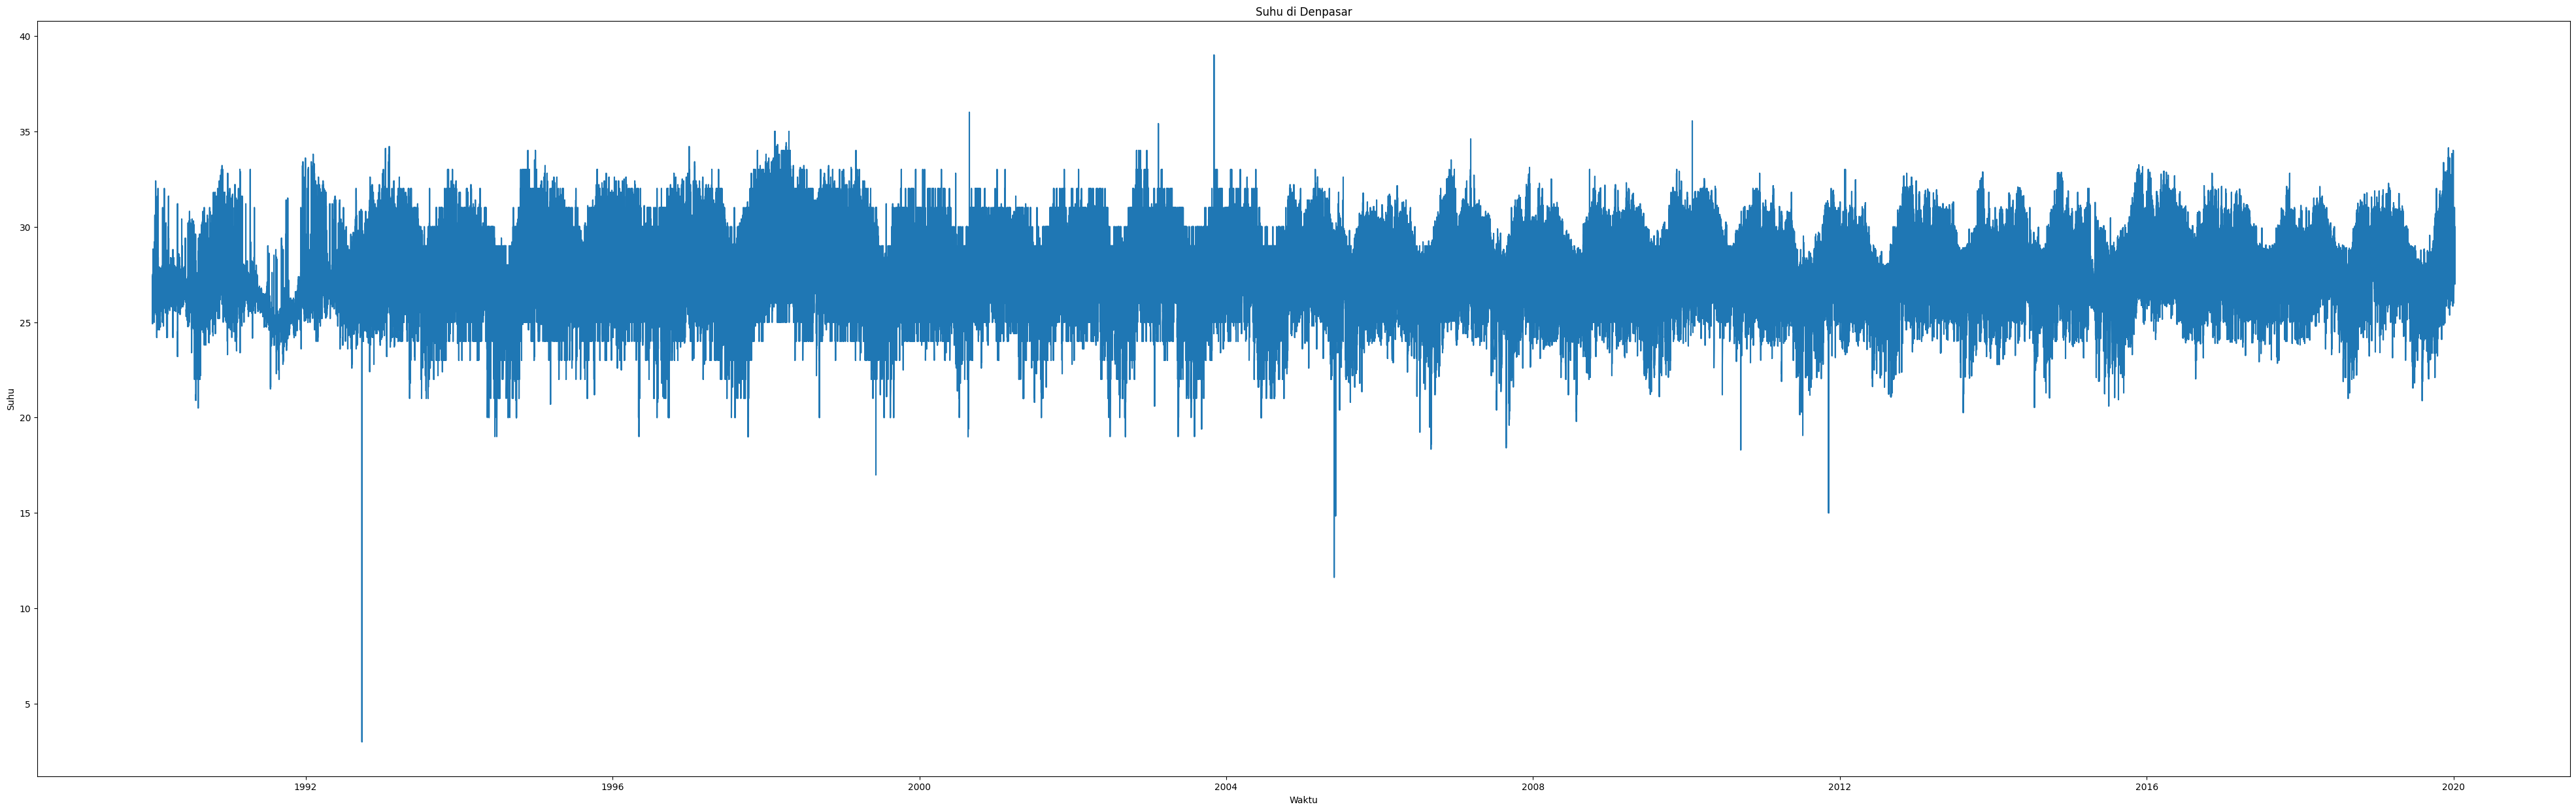

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(50,15))
plt.plot(datadenpasar)
plt.title('Suhu di Denpasar')
plt.xlabel('Waktu')
plt.ylabel('Suhu')
plt.show()

#Normalize data

In [ ]:
# Normalize data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler(feature_range = (0,1))
suhu_scaled = scaler.fit_transform(df['temp'].values.reshape(-1, 1))

In [ ]:
train_size = int(len(suhu_scaled) * 0.8)
X_train_scaled, X_test_scaled = suhu_scaled[:train_size], suhu_scaled[train_size:]
waktu_train, waktu_test = df['timestamp'][:train_size], df['timestamp'][train_size:]

In [ ]:
X_train_scaled, X_test_scaled

(array([[0.63388889],
        [0.64444444],
        [0.65138889],
        ...,
        [0.67777778],
        [0.71611111],
        [0.73305556]]),
 array([[0.73361111],
        [0.755     ],
        [0.76527778],
        ...,
        [0.69444444],
        [0.69444444],
        [0.69444444]]))

In [ ]:
waktu_train, waktu_test

(0        1990-01-01 00:00:00+00:00
 1        1990-01-01 01:00:00+00:00
 2        1990-01-01 02:00:00+00:00
 3        1990-01-01 03:00:00+00:00
 4        1990-01-01 04:00:00+00:00
                     ...           
 211934   2014-01-08 21:00:00+00:00
 211935   2014-01-08 22:00:00+00:00
 211936   2014-01-08 23:00:00+00:00
 211937   2014-01-09 00:00:00+00:00
 211938   2014-01-09 01:00:00+00:00
 Name: timestamp, Length: 211939, dtype: datetime64[ns, UTC],
 211939   2014-01-09 02:00:00+00:00
 211940   2014-01-09 03:00:00+00:00
 211941   2014-01-09 04:00:00+00:00
 211942   2014-01-09 05:00:00+00:00
 211943   2014-01-09 06:00:00+00:00
                     ...           
 264919   2020-01-07 19:00:00+00:00
 264920   2020-01-07 20:00:00+00:00
 264921   2020-01-07 21:00:00+00:00
 264922   2020-01-07 22:00:00+00:00
 264923   2020-01-07 23:00:00+00:00
 Name: timestamp, Length: 52985, dtype: datetime64[ns, UTC])

In [ ]:
import tensorflow as tf

def windowed_dataset(series, window_size, batch_size, shuffle_buffer):
    series = tf.expand_dims(series, axis=-1)
    ds = tf.data.Dataset.from_tensor_slices(series)
    ds = ds.window(window_size + 1, shift=1, drop_remainder=True)
    ds = ds.flat_map(lambda w: w.batch(window_size + 1))
    ds = ds.shuffle(shuffle_buffer)
    ds = ds.map(lambda w: (w[:-1], w[-1:]))
    return ds.batch(batch_size).prefetch(1)

# Model

In [ ]:
# model
from keras.layers import Dense, LSTM

data_x_train = windowed_dataset(X_train_scaled, window_size=60, batch_size=100, shuffle_buffer=5000)
data_x_test = windowed_dataset(X_test_scaled, window_size=60, batch_size=100, shuffle_buffer=5000)

model = tf.keras.models.Sequential([
  #tf.keras.layers.Conv1D(filters=32, kernel_size=5,
  #                    strides=1, padding="causal",
  #                    activation="relu",
  #                    input_shape=[None, 1]),
  tf.keras.layers.LSTM(32, return_sequences=True, input_shape=[None, 1]),
  tf.keras.layers.LSTM(32, return_sequences=True),
  tf.keras.layers.Dense(16, activation="relu"),
  tf.keras.layers.Dense(16, activation="relu"),
  tf.keras.layers.Dense(1),
  #tf.keras.layers.Lambda(lambda x: x )
])

optimizer = tf.keras.optimizers.SGD(learning_rate=0.001, momentum=0.9)
model.compile(loss=tf.keras.losses.Huber(),
              optimizer=optimizer,
              metrics=["mae"])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, None, 16)          1152      
                                                                 
 lstm_1 (LSTM)               (None, None, 16)          2112      
                                                                 
 dense (Dense)               (None, None, 8)           136       
                                                                 
 dense_1 (Dense)             (None, None, 8)           72        
                                                                 
 dense_2 (Dense)             (None, None, 1)           9         
                                                                 
Total params: 3481 (13.60 KB)
Trainable params: 3481 (13.60 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
data_range = np.ptp(suhu_scaled)
mae_threshold = data_range * 0.1

In [ ]:
mae_threshold

0.09999999999999999

In [ ]:
# callback
class myCallback(tf.keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs={}):
        if logs.get('mae') < mae_threshold:
            self.model.stop_training = True
            print("\nMAE from the model is < 10% of the data range.")

callbacks = myCallback()

In [ ]:
#Train the model
history = model.fit(data_x_train, epochs=30, validation_data=data_x_test, callbacks=[callbacks])

Epoch 1/30
   2119/Unknown - 237s 109ms/step - loss: 0.0046 - mae: 0.0585
MAE from the model is < 10% of the data range.
2119/2119 [==============================] - 269s 123ms/step - loss: 0.0046 - mae: 0.0585 - val_loss: 0.0015 - val_mae: 0.0435


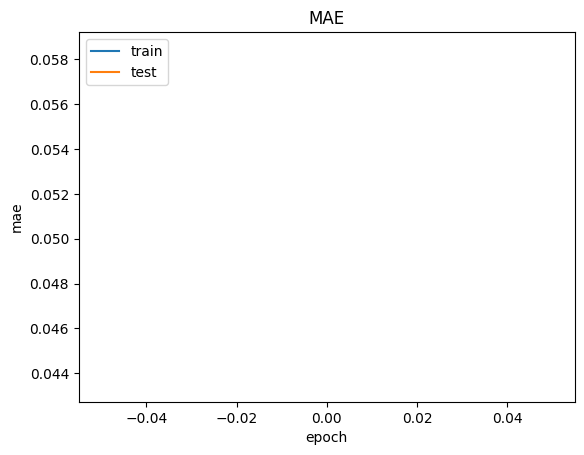

In [ ]:
# plot of mae
import matplotlib.pyplot as plt
plt.plot(history.history['mae'])
plt.plot(history.history['val_mae'])
plt.title('MAE')
plt.ylabel('mae')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

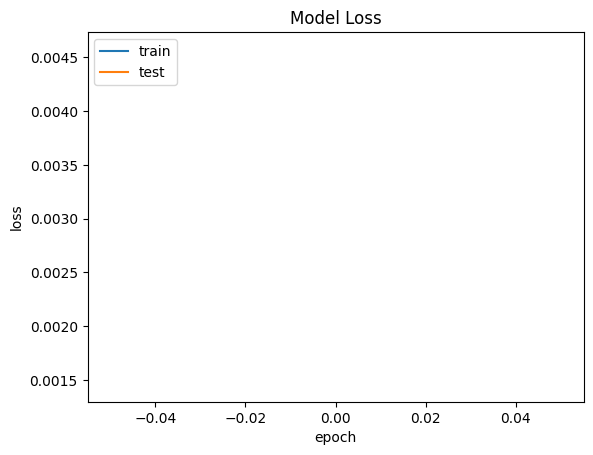

In [ ]:

# plot of loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()